## Heirarchial 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
import seaborn as sns

In [2]:
ls

 Volume in drive C is Local Disk 
 Volume Serial Number is A908-B29E

 Directory of C:\Users\SP\Downloads\Project\08- PCA\code

18-Jan-23  11:21 PM                 1 --
06-Feb-23  08:36 PM    <DIR>          .
06-Feb-23  08:36 PM    <DIR>          ..
06-Feb-23  08:35 PM    <DIR>          .ipynb_checkpoints
06-Feb-23  08:35 PM           430,505 old PCA .ipynb
06-Feb-23  08:36 PM           411,731 Untitled.ipynb
               3 File(s)        842,237 bytes
               3 Dir(s)  159,768,735,744 bytes free


In [3]:
wine=pd.read_csv('F:\ExcelR Assingment\Csv Files\PCA/wine.csv')

In [4]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df=wine.drop('Type',axis=1)

In [6]:
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
df[df.duplicated(keep=False)]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [9]:
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SP\anaconda3\lib\site-packages\

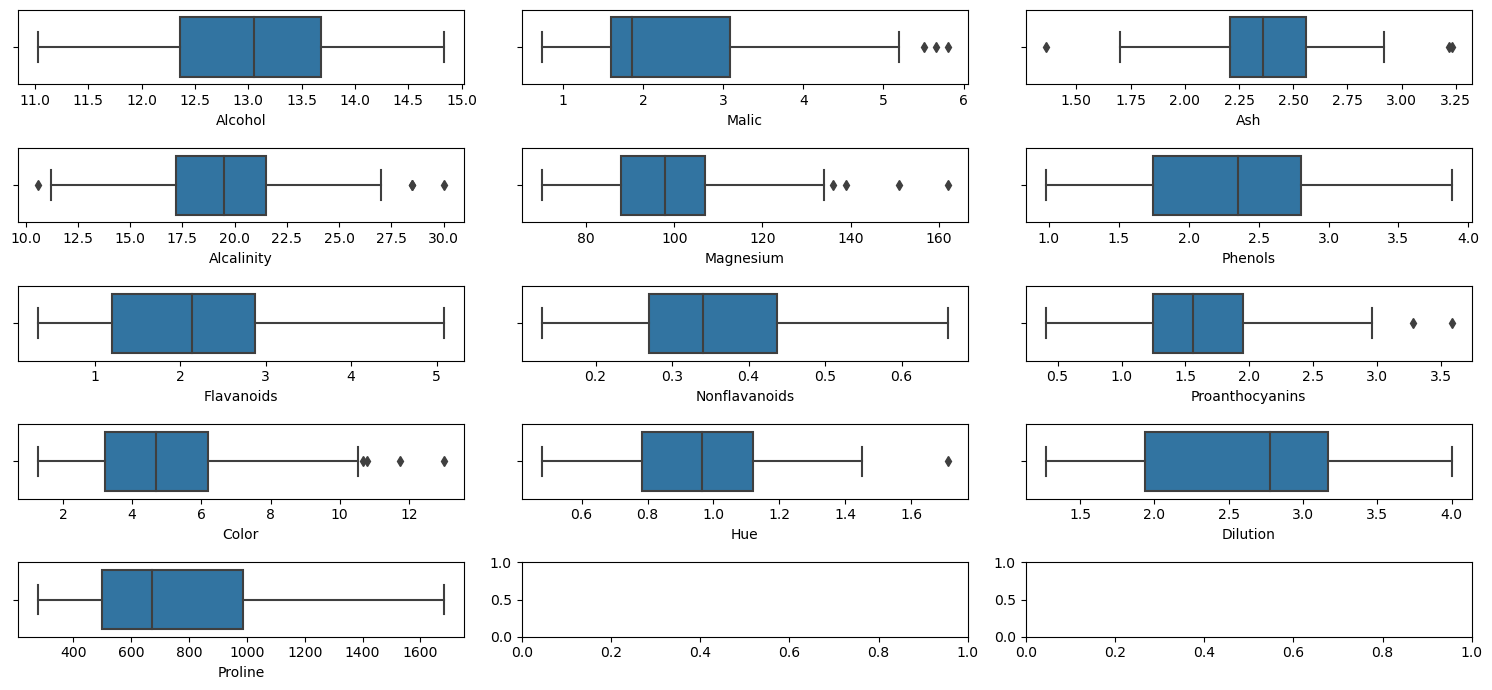

In [10]:
fig, ax = plt.subplots(5, 3, figsize=(15,7))
sns.boxplot(df.Alcohol,ax=ax[0,0])
sns.boxplot(df.Malic,ax=ax[0,1])
sns.boxplot(df.Ash,ax=ax[0,2])
sns.boxplot(df.Alcalinity,ax=ax[1,0])
sns.boxplot(df.Magnesium,ax=ax[1,1])
sns.boxplot(df.Phenols,ax=ax[1,2])
sns.boxplot(df.Flavanoids,ax=ax[2,0])
sns.boxplot(df.Nonflavanoids,ax=ax[2,1])
sns.boxplot(df.Proanthocyanins,ax=ax[2,2])
sns.boxplot(df.Color,ax=ax[3,0])
sns.boxplot(df.Hue,ax=ax[3,1])
sns.boxplot(df.Dilution,ax=ax[3,2])
sns.boxplot(df.Proline, ax=ax[4,0])
plt.tight_layout()
plt.show()

C:\Users\SP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

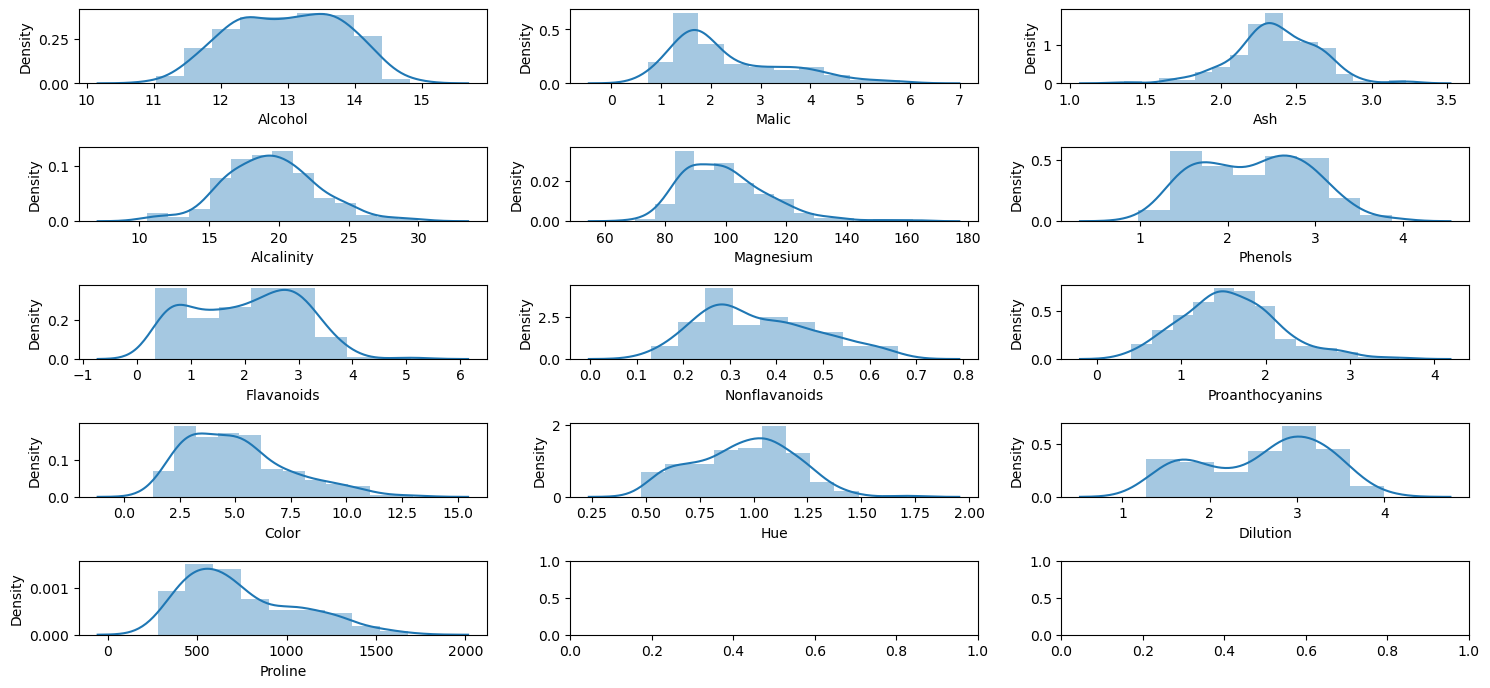

In [11]:
fig, ax = plt.subplots(5, 3, figsize=(15,7))
sns.distplot(df.Alcohol,ax=ax[0,0])
sns.distplot(df.Malic,ax=ax[0,1])
sns.distplot(df.Ash,ax=ax[0,2])
sns.distplot(df.Alcalinity,ax=ax[1,0])
sns.distplot(df.Magnesium,ax=ax[1,1])
sns.distplot(df.Phenols,ax=ax[1,2])
sns.distplot(df.Flavanoids,ax=ax[2,0])
sns.distplot(df.Nonflavanoids,ax=ax[2,1])
sns.distplot(df.Proanthocyanins,ax=ax[2,2])
sns.distplot(df.Color,ax=ax[3,0])
sns.distplot(df.Hue,ax=ax[3,1])
sns.distplot(df.Dilution,ax=ax[3,2])
sns.distplot(df.Proline,ax=ax[4,0])
plt.tight_layout()
plt.show()

In [12]:
df_norm=scale(df)

In [13]:
df_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [14]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

Text(0.5, 1.0, 'dendrogram')

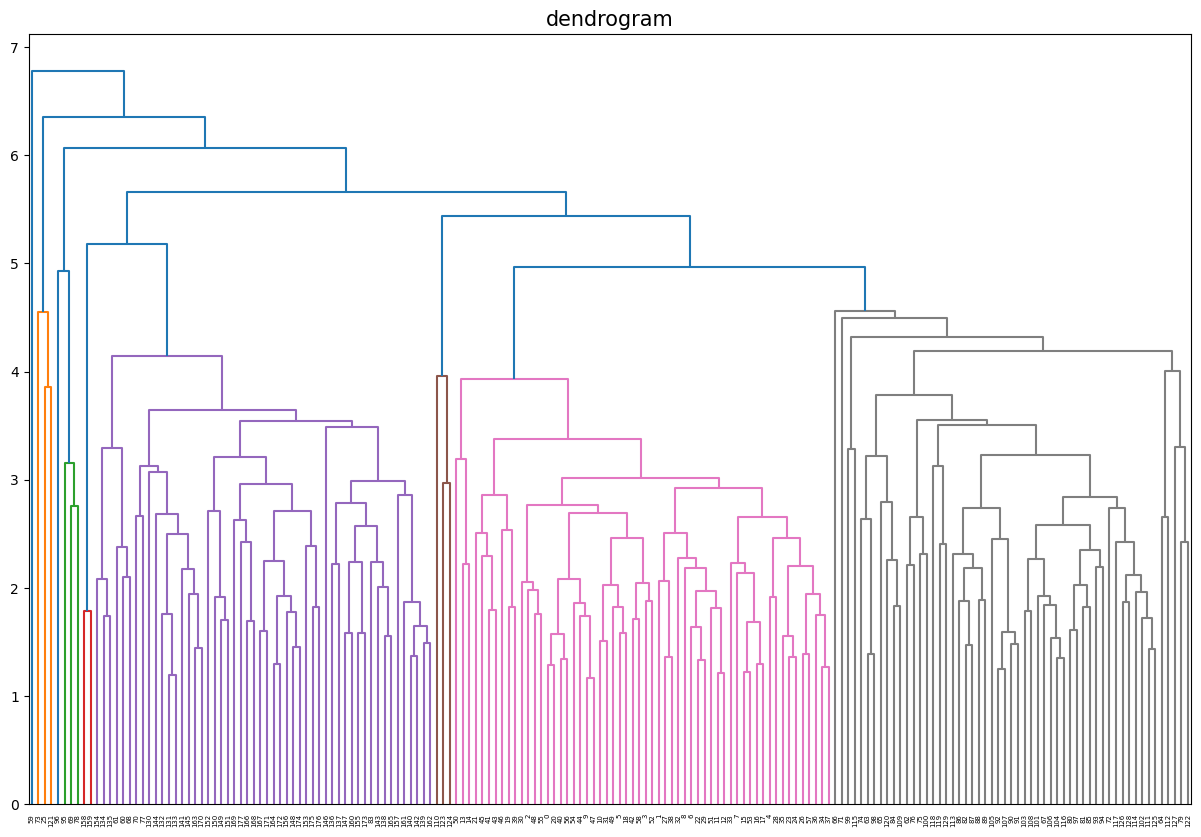

In [15]:
fig=plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))
plt.title('dendrogram',size=15)

In [16]:
hc1=AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [17]:
y_hc1=hc1.fit_predict(df_norm)
cluster=pd.DataFrame(y_hc1,columns=['cluster'])

In [18]:
wine['cluster']=y_hc1

In [19]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.500000,13.003879,1.996207,2.343017,18.665517,97.612069,2.568448,2.572069,0.322672,1.776379,4.27931,1.058879,3.017672,802.732759
1,1,2.888889,13.090185,3.181111,2.414815,21.087037,99.592593,1.697222,0.837778,0.455556,1.126852,6.99463,0.717148,1.710185,629.629630
2,2,1.666667,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.31000,1.123333,3.463333,760.000000
3,3,2.000000,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.95000,1.050000,1.820000,520.000000
4,4,2.000000,12.205000,1.455000,2.160000,18.025000,145.750000,1.962500,1.597500,0.237500,2.525000,2.83750,1.112500,2.567500,757.500000


In [20]:
for i in range(5):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 116

cluster 1
Total Members: 54

cluster 2
Total Members: 3

cluster 3
Total Members: 1

cluster 4
Total Members: 4



Text(0.5, 1.0, 'Dendrogram')

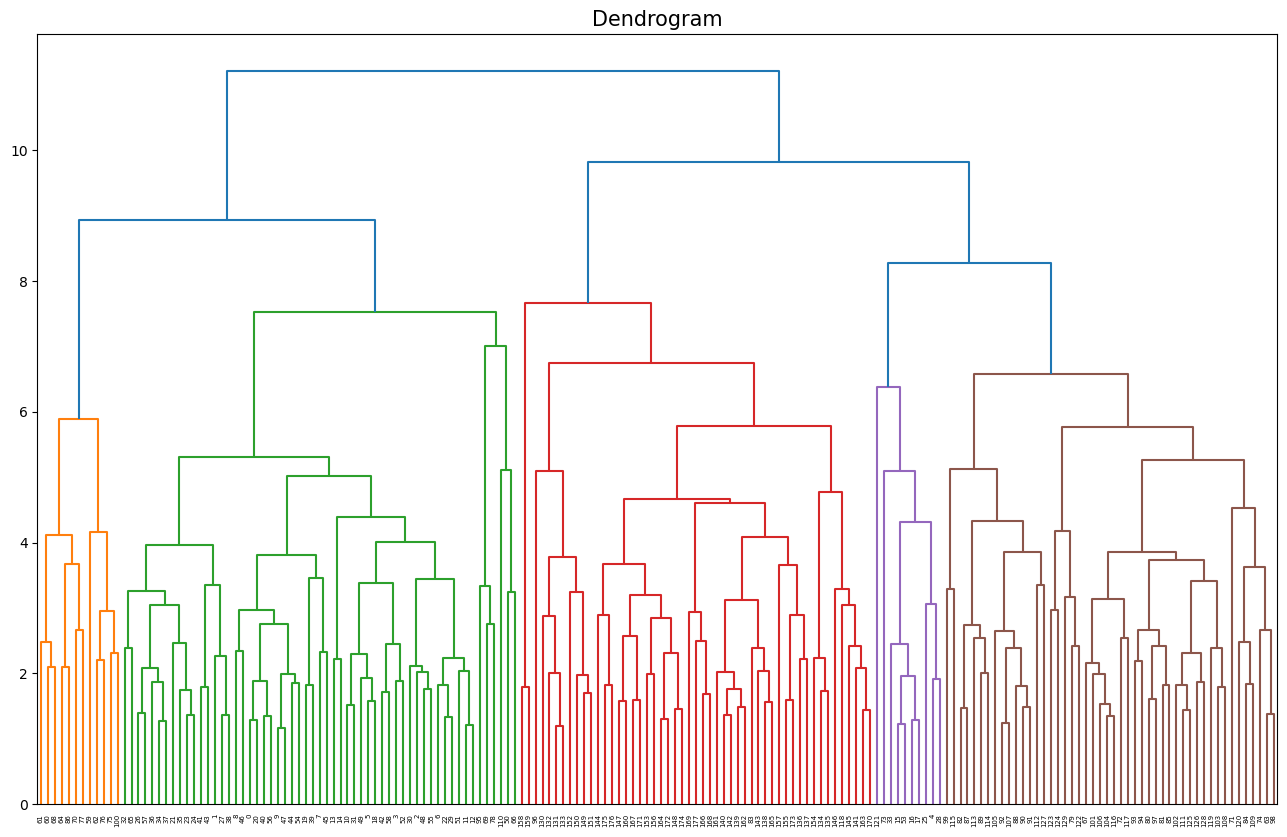

In [21]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.title("Dendrogram",size=15)

In [22]:
hc2=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [23]:
y_hc2=hc2.fit_predict(df_norm)
cluster=pd.DataFrame(y_hc2,columns=['cluster'])

In [24]:
wine['cluster']=y_hc2

In [25]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.941176,13.117843,3.322157,2.431765,21.333333,99.333333,1.675686,0.810588,0.444314,1.164314,7.170980,0.691373,1.709804,622.490196
1,1,1.105263,13.604211,1.982807,2.360526,16.652632,106.368421,2.797719,2.920175,0.274386,2.015088,5.326667,1.051579,3.141228,1073.052632
2,2,2.000000,12.210000,2.008750,2.291250,20.981250,88.375000,2.317292,2.175417,0.363542,1.662917,2.848125,1.038333,2.958333,479.083333
3,3,2.000000,12.465000,1.500833,2.045833,17.341667,98.500000,1.913333,1.475833,0.402500,0.967500,3.395000,1.155500,2.156667,565.000000
4,4,1.200000,13.400000,1.899000,2.814000,21.770000,120.100000,2.941000,3.129000,0.383000,1.751000,5.355000,1.152000,3.075000,1026.000000


In [26]:
for i in range(5):
    print('cluster',i)
    print('total number:',len(list(wine[wine['cluster']==i]['Type'].values)))
    print()


cluster 0
total number: 51

cluster 1
total number: 57

cluster 2
total number: 48

cluster 3
total number: 12

cluster 4
total number: 10



Text(0.5, 1.0, 'dendrogram')

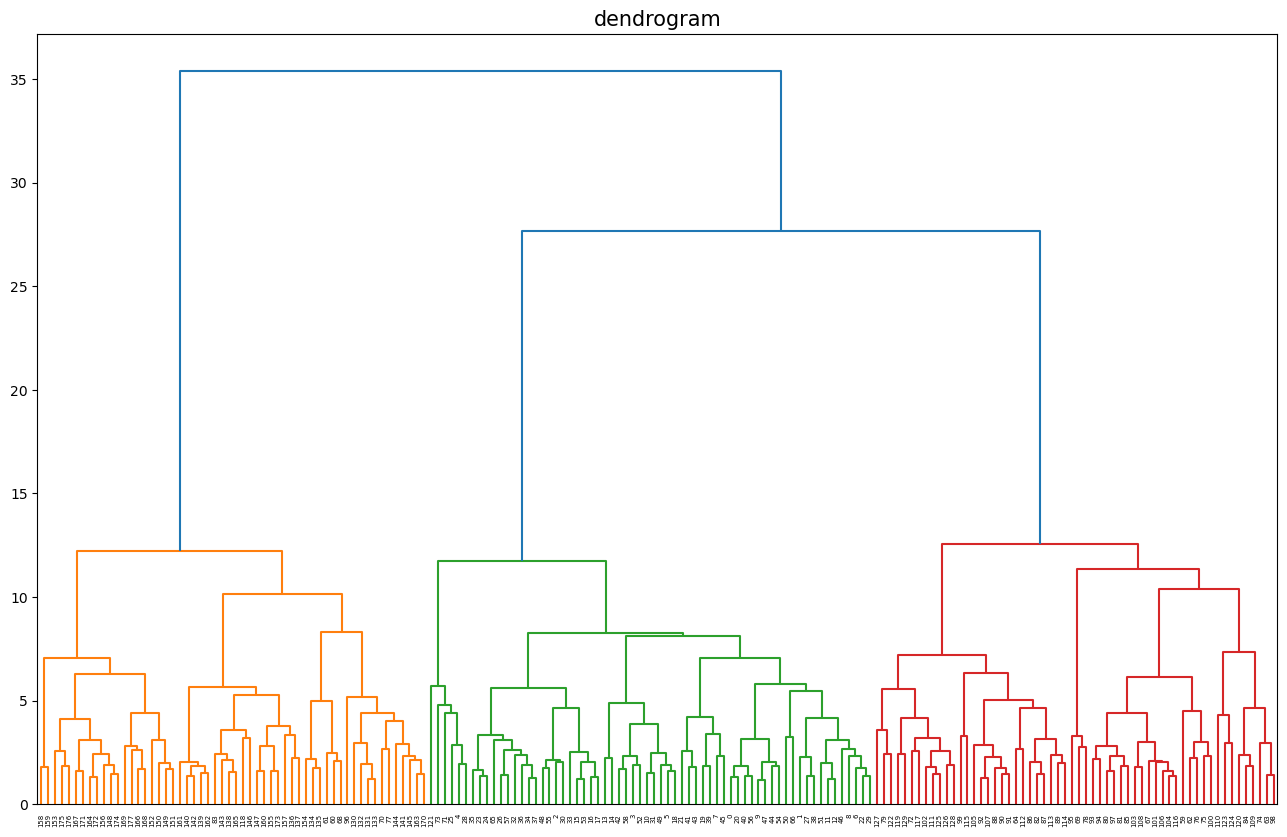

In [27]:
fig=plt.figure(figsize=(16,10))
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='ward'))
plt.title('dendrogram',size=15)

In [28]:
hc3=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [29]:
y_hc3 = hc3.fit_predict(df_norm)
Cluster=pd.DataFrame(y_hc3,columns=['Cluster'])

In [30]:
wine['cluster']=y_hc3

In [31]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.203966,1.938966,2.215172,20.208621,92.551724,2.262931,2.088103,0.355345,1.686552,2.895345,1.060000,2.862241,501.431034
1,1,2.857143,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429
2,2,1.078125,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875


In [32]:
for i in range(3):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 58

cluster 1
Total Members: 56

cluster 2
Total Members: 64



## kmeans

C:\Users\SP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


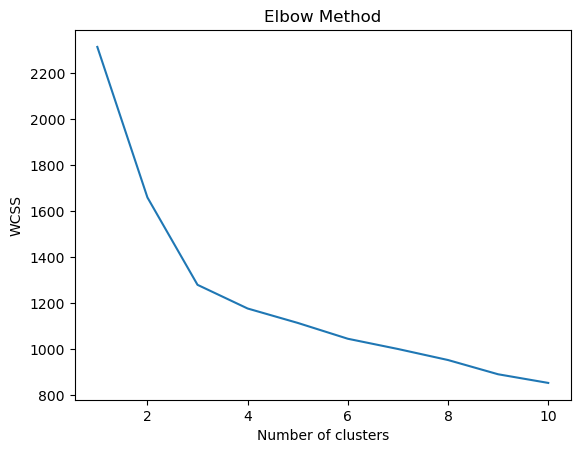

In [33]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
from sklearn.cluster import KMeans 
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(df_norm)

KMeans(n_clusters=3, random_state=42)

In [35]:
km_label=clusters_new.labels_

In [36]:
wine['cluster']=clusters_new.labels_

In [37]:
clusters_new.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [38]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,1,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,2,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


In [39]:
for i in range(3):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 51

cluster 1
Total Members: 62

cluster 2
Total Members: 65



In [40]:
from sklearn import metrics

In [41]:
SH_average=metrics.silhouette_score(df_norm,y_hc1)
SH_average

0.22945756295901437

In [42]:
SH_complete=metrics.silhouette_score(df_norm,y_hc2)
SH_complete

0.18836501623937577

In [43]:
SH_ward=metrics.silhouette_score(df_norm,y_hc3)
SH_ward

0.2774439826952265

In [44]:
SH_kmeans=metrics.silhouette_score(df_norm,km_label)
SH_kmeans

0.2848589191898987

## Now we perform the PCA on the Normalized Data

In [45]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(df_norm)

In [46]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [47]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [48]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

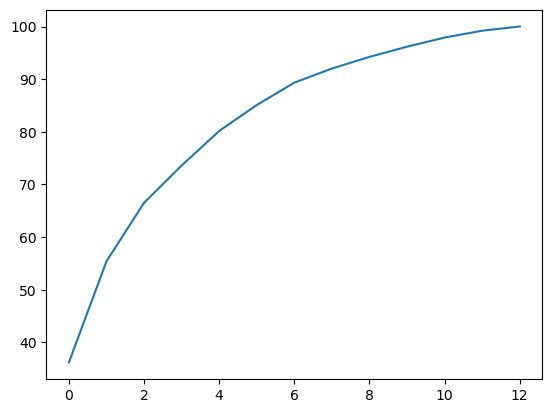

In [49]:
plt.plot(var1)

In [50]:
wine_pca=pca_values[:,0:3]

Text(0.5, 1.0, 'dendrogram')

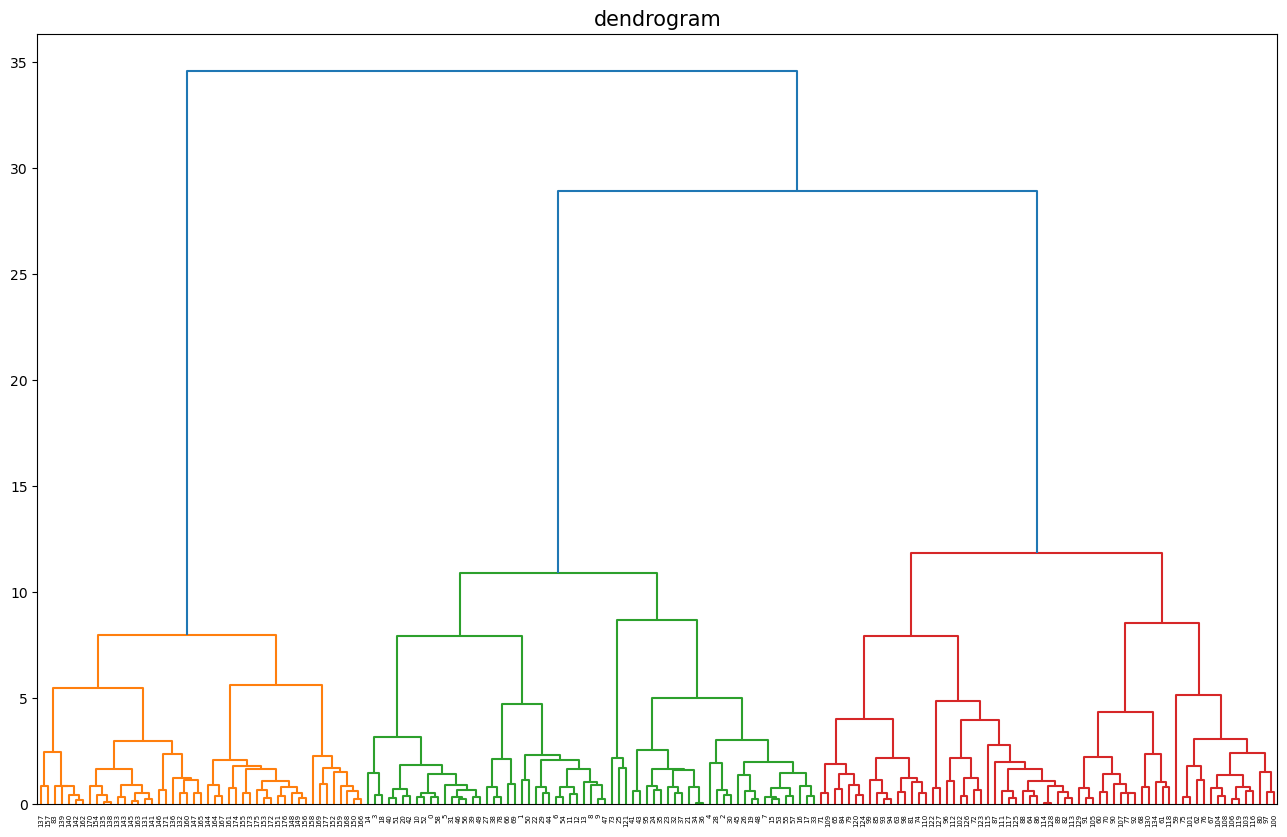

In [51]:
fig=plt.figure(figsize=(16,10))
dendrogram=sch.dendrogram(sch.linkage(wine_pca,method='ward'))
plt.title("dendrogram",size=15)

In [52]:
hc1p = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [53]:
y_hc1p = hc1p.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc1p,columns=['Clusters'])

In [54]:
wine['cluster']=y_hc1p

In [55]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.030303,12.264242,1.932121,2.245455,20.087879,91.666667,2.220152,1.991364,0.367727,1.540455,3.036364,1.042515,2.729848,504.439394
1,1,2.978723,13.171489,3.431702,2.441064,21.595745,98.829787,1.674894,0.792979,0.452766,1.165957,7.452553,0.682979,1.702553,627.021277
2,2,1.092308,13.624769,1.954769,2.435538,17.373846,108.600000,2.819692,2.961692,0.290154,1.949385,5.379538,1.069538,3.149077,1079.753846


In [56]:
for i in range(3):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 66

cluster 1
Total Members: 47

cluster 2
Total Members: 65



Text(0.5, 1.0, 'dendrogram')

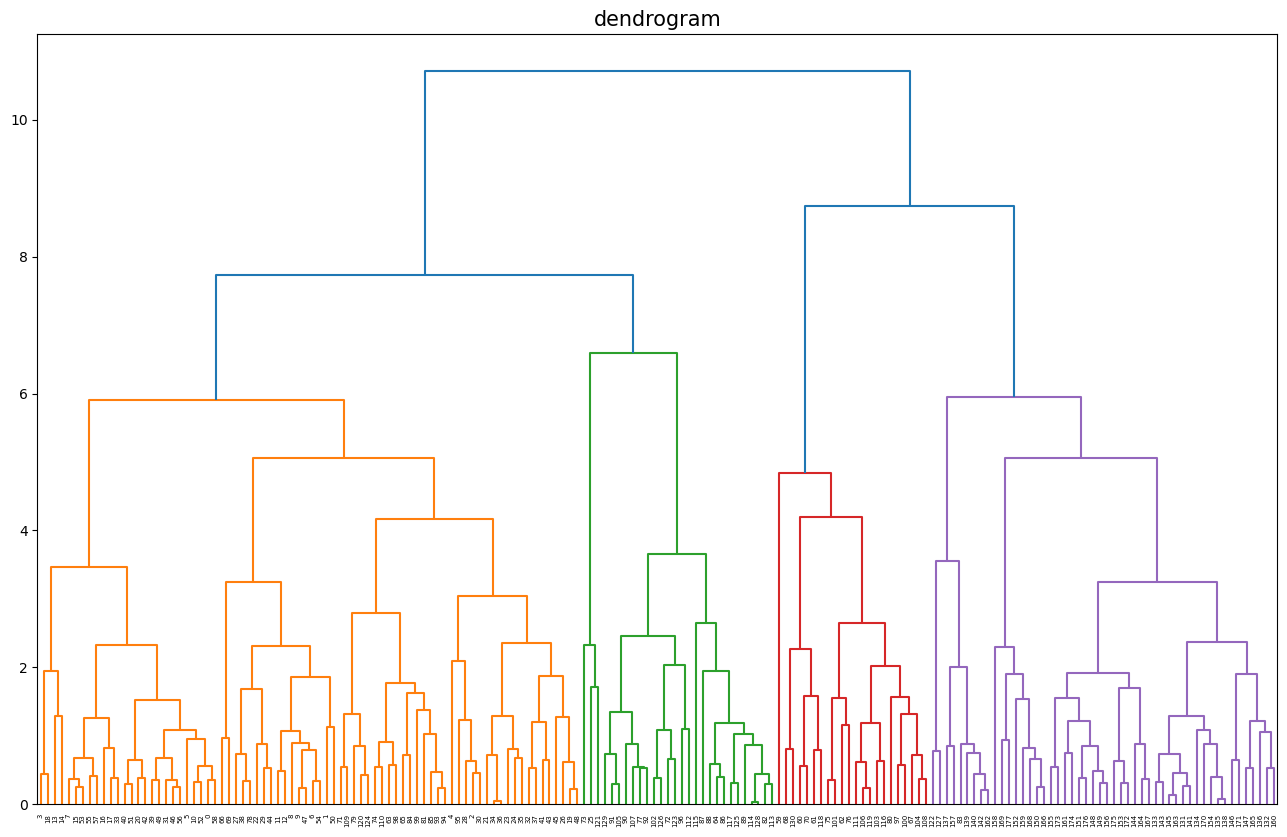

In [57]:
fig=plt.figure(figsize=(16,10))
dendrogram=sch.dendrogram(sch.linkage(wine_pca,method='complete'))
plt.title("dendrogram",size=15)

In [58]:
hc2p = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [59]:
y_hc2p = hc2p.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc2p,columns=['Cluster'])

In [60]:
wine['cluster']=y_hc2p

In [61]:

wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.940000,13.115600,3.381800,2.449800,21.750000,98.480000,1.701000,0.844400,0.457800,1.190400,7.216000,0.694800,1.741800,619.020000
1,1,1.256410,13.377692,1.982564,2.391154,17.432051,104.743590,2.812436,2.877051,0.281923,1.985513,4.978462,1.068077,3.118333,979.397436
2,2,2.045455,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636
3,3,2.000000,12.153200,2.035600,2.381200,21.808000,90.360000,2.020800,1.888800,0.427600,1.455200,2.769600,1.041200,2.736800,472.800000
4,4,1.666667,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.310000,1.123333,3.463333,760.000000


In [62]:
for i in range(4):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 50

cluster 1
Total Members: 78

cluster 2
Total Members: 22

cluster 3
Total Members: 25



In [63]:
fig=plt.figure(figsize=(16,10))
dendrogram=sch.dendrogram(sch.linkage(wine_pca, method='average'))
plt.title(dendrogram,size=15)

Text(0.5, 1.0, "{'icoord': [[15.0, 15.0, 25.0, 25.0], [45.0, 45.0, 55.0, 55.0], [35.0, 35.0, 50.0, 50.0], [20.0, 20.0, 42.5, 42.5], [105.0, 105.0, 115.0, 115.0], [95.0, 95.0, 110.0, 110.0], [85.0, 85.0, 102.5, 102.5], [125.0, 125.0, 135.0, 135.0], [93.75, 93.75, 130.0, 130.0], [75.0, 75.0, 111.875, 111.875], [65.0, 65.0, 93.4375, 93.4375], [175.0, 175.0, 185.0, 185.0], [165.0, 165.0, 180.0, 180.0], [155.0, 155.0, 172.5, 172.5], [145.0, 145.0, 163.75, 163.75], [195.0, 195.0, 205.0, 205.0], [154.375, 154.375, 200.0, 200.0], [215.0, 215.0, 225.0, 225.0], [245.0, 245.0, 255.0, 255.0], [235.0, 235.0, 250.0, 250.0], [265.0, 265.0, 275.0, 275.0], [305.0, 305.0, 315.0, 315.0], [295.0, 295.0, 310.0, 310.0], [325.0, 325.0, 335.0, 335.0], [345.0, 345.0, 355.0, 355.0], [330.0, 330.0, 350.0, 350.0], [302.5, 302.5, 340.0, 340.0], [285.0, 285.0, 321.25, 321.25], [270.0, 270.0, 303.125, 303.125], [242.5, 242.5, 286.5625, 286.5625], [220.0, 220.0, 264.53125, 264.53125], [365.0, 365.0, 375.0, 375.0], [3

ValueError: Image size of 242335x837 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1600x1000 with 1 Axes>

In [64]:
hc3p = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')

In [65]:
y_hc3p=hc3p.fit_predict(wine_pca)
cluster=pd.DataFrame(y_hc2p,columns=['cluster'])

In [66]:
wine['cluster']=y_hc3p

In [67]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.215833,1.971000,2.265167,20.498333,91.083333,2.247667,2.084500,0.361167,1.619833,2.943000,1.059100,2.831833,498.683333
1,1,1.065574,13.684754,1.945902,2.399836,16.800000,107.524590,2.809344,2.937213,0.283934,1.953115,5.449508,1.067377,3.137213,1101.131148
2,2,2.923077,13.138077,3.261731,2.416538,21.159615,98.884615,1.700192,0.828077,0.453846,1.131923,7.156538,0.698269,1.701154,621.576923
3,3,2.000000,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.050000,1.820000,520.000000
4,4,1.500000,12.710000,2.090000,2.980000,26.125000,125.000000,2.977500,3.335000,0.385000,1.892500,4.312500,1.102500,3.330000,753.750000


In [68]:
for i in range(5):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 60

cluster 1
Total Members: 61

cluster 2
Total Members: 52

cluster 3
Total Members: 1

cluster 4
Total Members: 4



## Applying kmeans Clustering

C:\Users\SP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


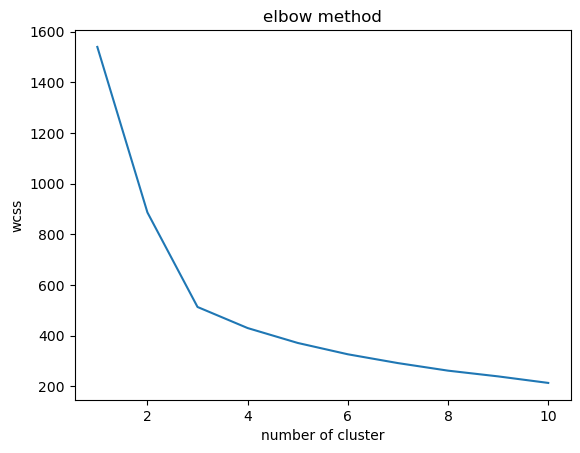

In [69]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine_pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.show()

In [70]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(wine_pca)

KMeans(n_clusters=3, random_state=42)

In [71]:
KM_pca_label=clusters_new.labels_

In [72]:
wine['cluster'] = clusters_new.labels_

In [73]:
clusters_new.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01]])

In [74]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,1,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,2,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


In [75]:
for i in range(3):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 51

cluster 1
Total Members: 62

cluster 2
Total Members: 65



In [76]:
from sklearn import metrics

In [77]:
SH_ward_PCA=metrics.silhouette_score(wine_pca,y_hc1p)
SH_ward_PCA

0.44594921980629704

In [78]:
SH_complete_PCA=metrics.silhouette_score(wine_pca,y_hc2p)
SH_complete_PCA

0.35584479879635356

In [79]:
SH_average_PCA=metrics.silhouette_score(wine_pca,y_hc3p)
SH_average_PCA

0.44654492780235827

In [80]:
SH_kmeans_PCA=metrics.silhouette_score(wine_pca,KM_pca_label)
SH_kmeans_PCA

0.4537999848257617

In [81]:
SH_average,SH_ward,SH_complete,SH_kmeans

(0.22945756295901437,
 0.2774439826952265,
 0.18836501623937577,
 0.2848589191898987)

In [82]:
SH_ward_PCA,SH_average_PCA,SH_complete_PCA,SH_kmeans_PCA

(0.44594921980629704,
 0.44654492780235827,
 0.35584479879635356,
 0.4537999848257617)